# Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C://Users//as//Downloads')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import *
from sklearn import metrics, datasets
import warnings
warnings.filterwarnings("ignore")    

# Loading the dataset

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,id,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,InflightWifiService,Departure/ArrivalTimeConvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#  Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               103904 non-null  int64  
 1   Gender                           103904 non-null  object 
 2   CustomerType                     103904 non-null  object 
 3   Age                              103904 non-null  int64  
 4   TypeofTravel                     103904 non-null  object 
 5   Class                            103904 non-null  object 
 6   FlightDistance                   103904 non-null  int64  
 7   InflightWifiService              103904 non-null  int64  
 8   Departure/ArrivalTimeConvenient  103904 non-null  int64  
 9   EaseOfOnlineBooking              103904 non-null  int64  
 10  GateLocation                     103904 non-null  int64  
 11  FoodAndDrink                     103904 non-null  int64  
 12  On

In [5]:
print(len(df.columns))

24


In [6]:
df.describe()

,id,Age,FlightDistance,InflightWifiService,Departure/ArrivalTimeConvenient,EaseOfOnlineBooking,GateLocation,FoodAndDrink,OnlineBoarding,SeatComfort,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.shape

(103904, 24)

In [8]:
df.describe(include=["object", "bool"])

,Gender,CustomerType,TypeofTravel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


#### Copmments to be included for deletion of Age and Id Columns.

In [9]:
del df["id"]
del df["Age"]

# Checking null values 

In [10]:
df.isna().sum()/df.shape[0]*100

Gender                             0.000000
CustomerType                       0.000000
TypeofTravel                       0.000000
Class                              0.000000
FlightDistance                     0.000000
InflightWifiService                0.000000
Departure/ArrivalTimeConvenient    0.000000
EaseOfOnlineBooking                0.000000
GateLocation                       0.000000
FoodAndDrink                       0.000000
OnlineBoarding                     0.000000
SeatComfort                        0.000000
InflightEntertainment              0.000000
OnBoardService                     0.000000
LegRoomService                     0.000000
BaggageHandling                    0.000000
CheckinService                     0.000000
InflightService                    0.000000
Cleanliness                        0.000000
DepartureDelayInMinutes            0.000000
ArrivalDelayInMinutes              0.298352
satisfaction                       0.000000
dtype: float64

#### Since the field ArrivalDelayInMinutes has null values it can be removed from the dataset.

In [11]:
del df["ArrivalDelayInMinutes"]

In [12]:
df.isna().sum()/df.shape[0]*100

Gender                             0.0
CustomerType                       0.0
TypeofTravel                       0.0
Class                              0.0
FlightDistance                     0.0
InflightWifiService                0.0
Departure/ArrivalTimeConvenient    0.0
EaseOfOnlineBooking                0.0
GateLocation                       0.0
FoodAndDrink                       0.0
OnlineBoarding                     0.0
SeatComfort                        0.0
InflightEntertainment              0.0
OnBoardService                     0.0
LegRoomService                     0.0
BaggageHandling                    0.0
CheckinService                     0.0
InflightService                    0.0
Cleanliness                        0.0
DepartureDelayInMinutes            0.0
satisfaction                       0.0
dtype: float64

In [13]:
df.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [14]:
df['CustomerType'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: CustomerType, dtype: int64

In [15]:
df.CustomerType.value_counts(normalize=True)

Loyal Customer       0.817322
disloyal Customer    0.182678
Name: CustomerType, dtype: float64

In [16]:
df["TypeofTravel"].value_counts()

Business travel    71655
Personal Travel    32249
Name: TypeofTravel, dtype: int64

In [17]:
df.TypeofTravel.value_counts(normalize=True)

Business travel    0.689627
Personal Travel    0.310373
Name: TypeofTravel, dtype: float64

In [18]:
df["Class"].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [19]:
df["Class"].value_counts(normalize=True)

Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: Class, dtype: float64

In [20]:
df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [21]:
df.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

# Visual Data Analysis

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

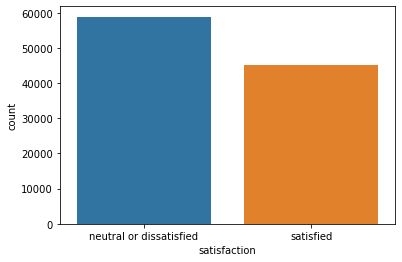

In [22]:
sns.countplot(x=df['satisfaction'])

<AxesSubplot:xlabel='Class', ylabel='count'>

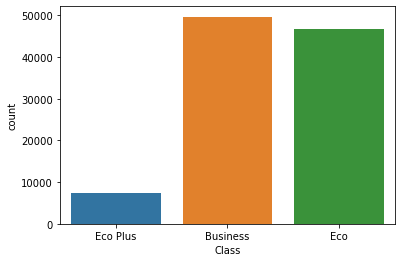

In [23]:
sns.countplot(x=df['Class'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

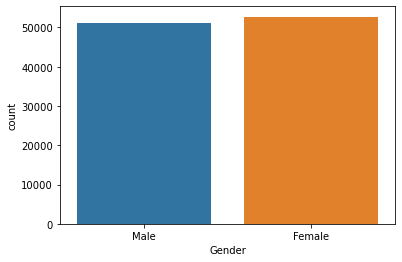

In [24]:
sns.countplot(x=df['Gender'])

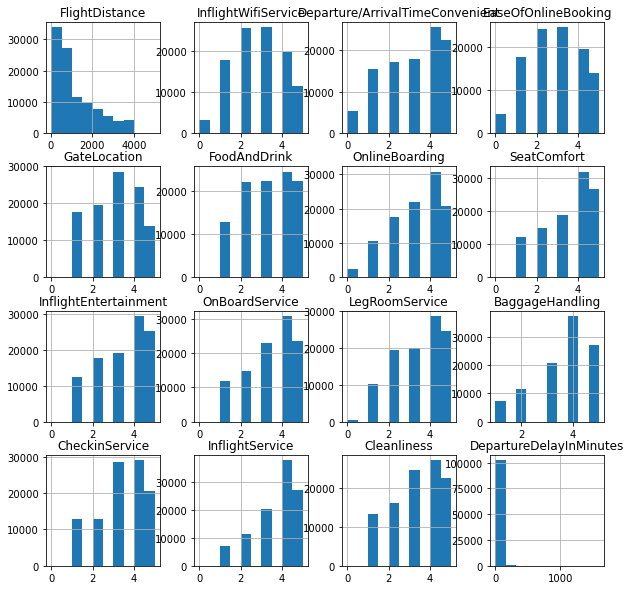

In [25]:
ax = df.hist(figsize = (10,10))
plt.show()

<AxesSubplot:xlabel='CustomerType', ylabel='count'>

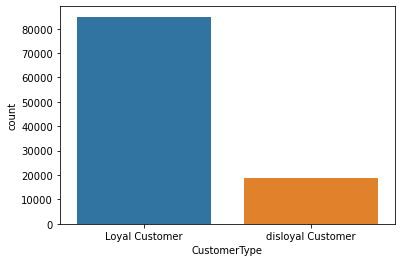

In [26]:
sns.countplot(x=df['CustomerType'])

<AxesSubplot:xlabel='TypeofTravel', ylabel='count'>

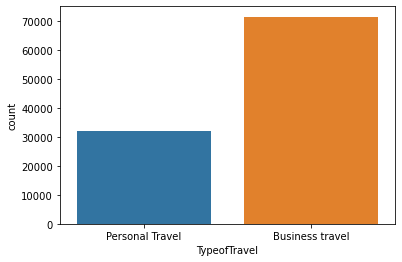

In [27]:
sns.countplot(x=df['TypeofTravel'])

# Data Preprocessing

In [28]:
le=LabelEncoder()

In [29]:
df.loc[:,['CustomerType']]=le.fit_transform(df.loc[:,['CustomerType']])

In [30]:
df.loc[:,['satisfaction']]=le.fit_transform(df.loc[:,['satisfaction']])

In [31]:
df.loc[:,['TypeofTravel']]=le.fit_transform(df.loc[:,['TypeofTravel']])

In [32]:
df.loc[:,['Gender']]=le.fit_transform(df.loc[:,['Gender']])

In [33]:
a=df["Class"].value_counts().to_dict()

In [34]:
a

{'Business': 49665, 'Eco': 46745, 'Eco Plus': 7494}

In [35]:
df["Class"]=df["Class"].map(a)

In [36]:
df["Class"].value_counts()

49665    49665
46745    46745
7494      7494
Name: Class, dtype: int64

In [37]:
df["CustomerType"].value_counts()

0    84923
1    18981
Name: CustomerType, dtype: int64

In [38]:
df["satisfaction"].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [39]:
df["TypeofTravel"].value_counts()

0    71655
1    32249
Name: TypeofTravel, dtype: int64

In [40]:
df["Gender"].value_counts()

0    52727
1    51177
Name: Gender, dtype: int64

In [41]:
df

,Gender,CustomerType,TypeofTravel,Class,FlightDistance,InflightWifiService,Departure/ArrivalTimeConvenient,EaseOfOnlineBooking,GateLocation,FoodAndDrink,...,SeatComfort,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,satisfaction
0,1,0,1,7494,460,3,4,3,1,5,...,5,5,4,3,4,4,5,5,25,0
1,1,1,0,49665,235,3,2,3,3,1,...,1,1,1,5,3,1,4,1,1,0
2,0,0,0,49665,1142,2,2,2,2,5,...,5,5,4,3,4,4,4,5,0,1
3,0,0,0,49665,562,2,5,5,5,2,...,2,2,2,5,3,1,4,2,11,0
4,1,0,0,49665,214,3,3,3,3,4,...,5,3,3,4,4,3,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,46745,192,2,1,2,3,2,...,2,2,3,1,4,2,3,2,3,0
103900,1,0,0,49665,2347,4,4,4,4,2,...,5,5,5,5,5,5,5,4,0,1
103901,1,1,0,49665,1995,1,1,1,3,4,...,5,4,3,2,4,5,5,4,7,0
103902,0,1,0,46745,1000,1,1,1,5,1,...,1,1,4,5,1,5,4,1,0,0


# Splitting the X and y (IVs and DV) 

In [42]:
X=df.iloc[:,:-1]

In [43]:
X

,Gender,CustomerType,TypeofTravel,Class,FlightDistance,InflightWifiService,Departure/ArrivalTimeConvenient,EaseOfOnlineBooking,GateLocation,FoodAndDrink,OnlineBoarding,SeatComfort,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes
0,1,0,1,7494,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,1,1,0,49665,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,0,0,0,49665,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,0,0,0,49665,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,1,0,0,49665,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,46745,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3
103900,1,0,0,49665,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0
103901,1,1,0,49665,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7
103902,0,1,0,46745,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [44]:
y = df[['satisfaction']]

In [45]:
y

,satisfaction
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


# Feature Selection Using Lasso Method

In [46]:
vm=VarianceThreshold(threshold=.5)

In [47]:
X.shape

(103904, 20)

In [48]:
x=vm.fit_transform(X)

In [49]:
x.shape

(103904, 17)

In [50]:
sel=SelectFromModel(Lasso(alpha=.05))

In [51]:
sel.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.05))

In [52]:
column=X.columns

In [53]:
important_feature=column[sel.get_support()]

In [54]:
important_feature

Index(['TypeofTravel', 'FlightDistance', 'InflightWifiService',
       'OnlineBoarding', 'InflightEntertainment', 'OnBoardService',
       'LegRoomService', 'CheckinService', 'DepartureDelayInMinutes'],
      dtype='object')

In [55]:
print("Total feature is {}".format(X.shape[1]))
print("Selected feature is {}".format(len(important_feature)))

Total feature is 20
Selected feature is 9


In [56]:
a=X[important_feature]

In [57]:
a

,TypeofTravel,FlightDistance,InflightWifiService,OnlineBoarding,InflightEntertainment,OnBoardService,LegRoomService,CheckinService,DepartureDelayInMinutes
0,1,460,3,3,5,4,3,4,25
1,0,235,3,3,1,1,5,1,1
2,0,1142,2,5,5,4,3,4,0
3,0,562,2,2,2,2,5,1,11
4,0,214,3,5,3,3,4,3,0
...,...,...,...,...,...,...,...,...,...
103899,0,192,2,2,2,3,1,2,3
103900,0,2347,4,4,5,5,5,5,0
103901,0,1995,1,1,4,3,2,5,7
103902,0,1000,1,1,1,4,5,5,0


In [58]:
a['satisfaction'] = y[:]

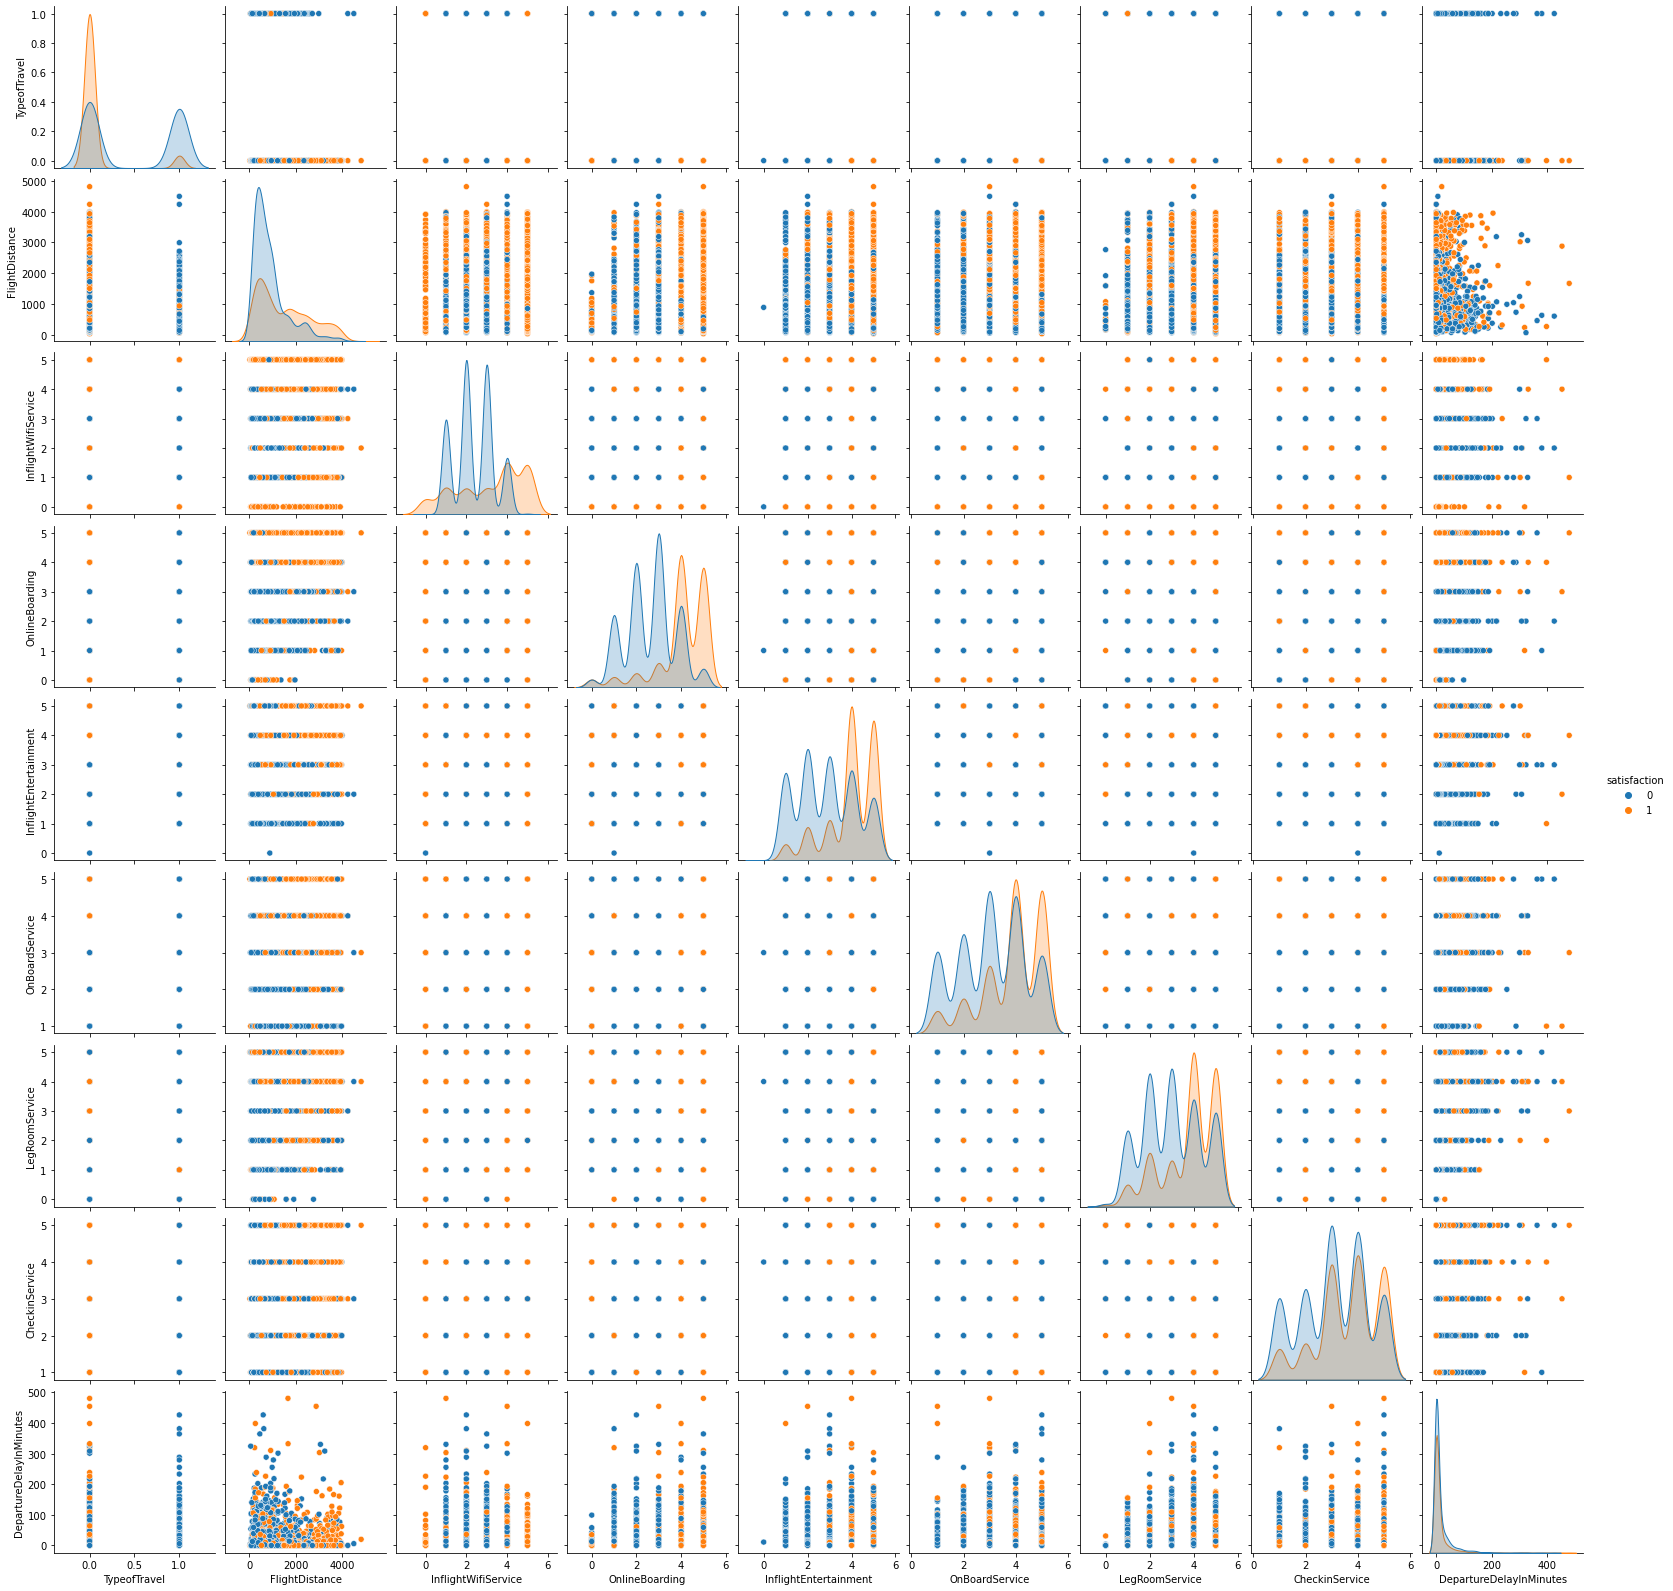

In [59]:
sns.pairplot(a.sample(4000), hue="satisfaction",diag_kind="kde")
plt.show()

In [60]:
corr = a.corr()

<AxesSubplot:>

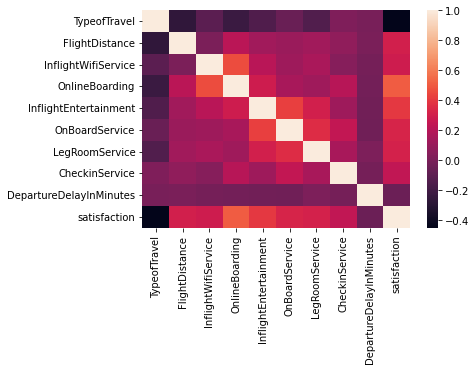

In [61]:
sns.heatmap(corr)

In [62]:
X=a.iloc[:,:-1]

# Splitting data as train and test

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
X_train

,TypeofTravel,FlightDistance,InflightWifiService,OnlineBoarding,InflightEntertainment,OnBoardService,LegRoomService,CheckinService,DepartureDelayInMinutes
17901,1,1235,1,1,4,4,4,5,0
49209,0,603,5,4,5,5,5,5,89
32340,1,2586,2,3,1,1,2,2,0
50831,0,2422,2,5,4,4,4,4,0
10989,1,1076,2,2,4,5,3,4,18
...,...,...,...,...,...,...,...,...,...
54886,0,637,3,3,3,4,3,3,1
76820,1,646,3,3,3,5,1,4,0
103694,0,1197,1,1,4,3,3,1,260
860,0,320,5,5,5,1,2,1,0


# Fitting and training the Model

In [66]:
y.value_counts()/y.shape[0]

satisfaction
0               0.566667
1               0.433333
dtype: float64

In [67]:
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(n_estimators=100,oob_score=True,max_samples=0.75,random_state=42,max_features=0.75)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors=7)
clf5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
clf6 = LGBMClassifier()
clf7 = XGBClassifier(objective='binary:logistic', eval_metric='logloss',learning_rate=0.001, n_estimators=100,subsample=0.80,max_delta_step=3, colsample_bylevel=0.7)

In [68]:
for clf in (clf1, clf2, clf3, clf4, clf5, clf6, clf7):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7838765558834851
RandomForestClassifier 0.9292955216219684
GaussianNB 0.8584306428846401
KNeighborsClassifier 0.7949121006031054
GradientBoostingClassifier 0.9125176440395226
LGBMClassifier 0.9340433722571538
XGBClassifier 0.91566149108174


In [69]:
for clf in (clf1, clf2, clf3, clf4, clf5, clf6, clf7):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, classification_report(y_test, y_pred))

LogisticRegression               precision    recall  f1-score   support

           0       0.86      0.74      0.79     17555
           1       0.72      0.84      0.77     13617

    accuracy                           0.78     31172
   macro avg       0.79      0.79      0.78     31172
weighted avg       0.79      0.78      0.78     31172

RandomForestClassifier               precision    recall  f1-score   support

           0       0.93      0.95      0.94     17555
           1       0.93      0.90      0.92     13617

    accuracy                           0.93     31172
   macro avg       0.93      0.93      0.93     31172
weighted avg       0.93      0.93      0.93     31172

GaussianNB               precision    recall  f1-score   support

           0       0.87      0.88      0.87     17555
           1       0.84      0.84      0.84     13617

    accuracy                           0.86     31172
   macro avg       0.86      0.86      0.86     31172
weighted avg       0.

In [70]:
eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),('knn', clf4), ('gbm', clf5),
                 ('lgbm', clf6), ('xgb', clf7)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3,clf4,clf5,clf6,clf7,eclf],
                       ['Logistic Regression', 'Random Forest', 'Naive Bayes',
                        'KNN','Gradient Boosting','Light Gradient Boosting','XG Boost','Ensemble']):
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=9)
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.80 (+/- 0.02) [Logistic Regression]
Accuracy: 0.93 (+/- 0.00) [Random Forest]
Accuracy: 0.86 (+/- 0.00) [Naive Bayes]
Accuracy: 0.80 (+/- 0.00) [KNN]
Accuracy: 0.91 (+/- 0.00) [Gradient Boosting]
Accuracy: 0.93 (+/- 0.00) [Light Gradient Boosting]
Accuracy: 0.92 (+/- 0.00) [XG Boost]
Accuracy: 0.92 (+/- 0.00) [Ensemble]


In [71]:
import pickle
pickle_out= open("clf2.pkl","wb")
pickle.dump(clf2,pickle_out)
pickle_out.close()

In [76]:
os.getcwd()

'C:\\Users\\as\\Downloads'